In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
news_text = pd.read_csv(r"C:\Users\okechukwu chude\Documents\Information Retrival\7071CEM-Publication-Search-Engine\bbc-text.csv")

In [4]:
news_text.head(5)

category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

In [5]:
news_text.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [6]:
news_text.isna().sum()

category    0
text        0
dtype: int64

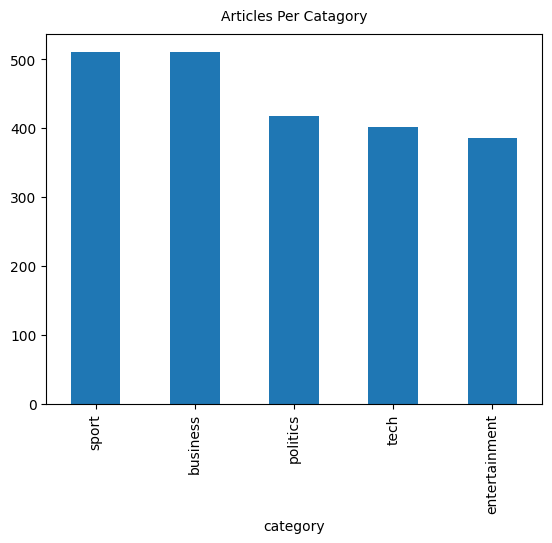

In [7]:
news_text['category'].value_counts().plot(kind='bar')
plt.title('Articles Per Catagory', size=10, pad=10);

Splitting The Data

In [8]:
X = news_text.text
y = news_text.category

#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)
print(X_train)
print(y_train)

407     bush to get  tough  on deficit us president ge...
1065    bellamy under new fire newcastle boss graeme s...
1141    mandelson warns bbc on campbell the bbc should...
987     john peel replacement show begins the permanen...
2145    wales coach elated with win mike ruddock paid ...
                              ...                        
960     fed warns of more us rate rises the us looks s...
905     bets off after big brother  leak  a bookmaker ...
1096    internet boom for gift shopping cyberspace is ...
235     consumer spending lifts us growth us economic ...
1061    t in the park sells out in days tickets for sc...
Name: text, Length: 1557, dtype: object
407          business
1065            sport
1141         politics
987     entertainment
2145            sport
            ...      
960          business
905     entertainment
1096             tech
235          business
1061    entertainment
Name: category, Length: 1557, dtype: object


vectorization

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english')

In [13]:
# fit the vectorizer on the training data

vectorizer.fit(X_train)

print(len(vectorizer.get_feature_names_out()))
print(vectorizer.vocabulary_)

25478
{'bush': 4197, 'to': 23160, 'get': 10193, 'tough': 23292, 'on': 16273, 'deficit': 6733, 'us': 24160, 'president': 17843, 'george': 10165, 'has': 10960, 'pledged': 17458, 'introduce': 12404, 'federal': 9119, 'budget': 4085, 'next': 15817, 'february': 9116, 'in': 11910, 'bid': 3352, 'halve': 10799, 'the': 22920, 'country': 6074, 'five': 9392, 'years': 25344, 'and': 2048, 'its': 12593, 'trade': 23351, 'are': 2313, 'both': 3741, 'deep': 6691, 'red': 18809, 'helping': 11139, 'push': 18293, 'dollar': 7546, 'lows': 14061, 'against': 1647, 'euro': 8579, 'fuelling': 9875, 'fears': 9103, 'about': 1270, 'economy': 7983, 'mr': 15439, 'indicated': 12012, 'there': 22947, 'would': 25217, 'be': 3073, 'strict': 22015, 'discipline': 7262, 'non': 15940, 'defence': 6714, 'spending': 21516, 'vow': 24568, 'cut': 6395, 'had': 10756, 'been': 3143, 'one': 16278, 'of': 16182, 'his': 11287, 're': 18624, 'election': 8083, 'declarations': 6656, 'hit': 11298, 'record': 18774, '412bn': 715, '211': 430, '6bn': 

In [15]:
####training data#######
X_transformed = vectorizer.transform(X_train)
X_transformed

<1557x25478 sparse matrix of type '<class 'numpy.int64'>'
	with 313963 stored elements in Compressed Sparse Row format>

In [16]:
X_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# for test data
X_test_transformed = vectorizer.transform(X_test)
X_test_transformed

<668x25478 sparse matrix of type '<class 'numpy.int64'>'
	with 130804 stored elements in Compressed Sparse Row format>

Building The model

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_transformed, y_train)

MultinomialNB()

In [19]:
# fit
nb.fit(X_transformed,y_train)

# predict class
y_pred_class = nb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = nb.predict_proba(X_test_transformed)

Performance Evaluation

In [20]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9790419161676647

In [21]:
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class, average = 'micro'))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class, average = 'micro'))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class, average = 'micro'))

PRECISION SCORE : 0.9790419161676647
RECALL SCORE : 0.9790419161676647
F1 SCORE : 0.9790419161676647


Testing model

In [28]:
s1 = ["Luke Donald to remain Europe's Ryder Cup captain for 2025 edition in New York"]
vec1 = vectorizer.transform(s1).toarray()
print('Headline:' ,s1)
print(str(list(nb.predict(vec1))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))

Headline: ["Luke Donald to remain Europe's Ryder Cup captain for 2025 edition in New York"]
sport
